Check Python version

In [1]:
!python --version

Python 3.9.18


Import libraries

In [2]:
import json
import yaml
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
from darts import TimeSeries
from darts.datasets import WeatherDataset
from darts.utils.missing_values import missing_values_ratio, fill_missing_values

### **Extract Data**

In [4]:
# Through online Darts
series = WeatherDataset().load()
dataset = series.pd_dataframe().reset_index()
dataset.index.name = None

In [5]:
dataset.shape

(52704, 22)

In [6]:
dataset.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)', 'rain (mm)', 'raining (s)', 'SWDR (W/m²)',
       'PAR (µmol/m²/s)', 'max. PAR (µmol/m²/s)', 'Tlog (degC)', 'CO2 (ppm)'],
      dtype='object', name='component')

In [7]:
dataset.head()

component,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
0,2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,...,1.02,1.60,224.3,0.0,0.0,0.0,0.0,0.0,11.45,428.1
1,2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,...,0.43,0.84,206.8,0.0,0.0,0.0,0.0,0.0,11.51,428.0
2,2020-01-01 00:30:00,1008.66,0.73,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,...,0.61,1.48,197.1,0.0,0.0,0.0,0.0,0.0,11.60,427.6
3,2020-01-01 00:40:00,1008.64,0.37,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,...,1.11,1.48,206.4,0.0,0.0,0.0,0.0,0.0,11.70,430.0
4,2020-01-01 00:50:00,1008.61,0.33,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,...,0.49,1.40,209.6,0.0,0.0,0.0,0.0,0.0,11.81,432.2


In [8]:
time_col = 'Date Time'
dataset[time_col] = pd.to_datetime(dataset[time_col])

In [9]:
dataset.tail()

component,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
52699,2020-12-31 23:20:00,978.32,2.28,277.16,-0.80,80.0,7.20,5.76,1.44,3.67,...,0.73,1.40,180.6,0.0,0.0,0.0,0.0,0.0,13.40,433.0
52700,2020-12-31 23:30:00,978.30,2.13,277.01,-0.43,83.1,7.12,5.92,1.20,3.77,...,0.43,0.82,174.0,0.0,0.0,0.0,0.0,0.0,13.42,439.6
52701,2020-12-31 23:40:00,978.26,1.99,276.88,-0.71,82.2,7.05,5.80,1.26,3.69,...,0.38,0.76,248.9,0.0,0.0,0.0,0.0,0.0,13.45,435.2
52702,2020-12-31 23:50:00,978.26,2.07,276.95,-0.77,81.4,7.09,5.77,1.32,3.68,...,0.57,1.07,196.6,0.0,0.0,0.0,0.0,0.0,13.47,433.9
52703,2021-01-01 00:00:00,978.24,2.01,276.89,-0.66,82.4,7.06,5.82,1.24,3.71,...,0.57,1.08,221.3,0.0,0.0,0.0,0.0,0.0,13.48,436.5


In [10]:
col_list = list(dataset.columns.values[1:])

In [11]:

series = TimeSeries.from_dataframe(dataset, time_col, col_list)
series_filled = fill_missing_values(series)
df_filled = series_filled.pd_dataframe().reset_index()

Define the required time and target columns

In [12]:
# time_col = dataset.columns[0]
target_col = dataset.columns[-1]
dataset[time_col] = dataset[time_col].astype(str)

Change target column to float

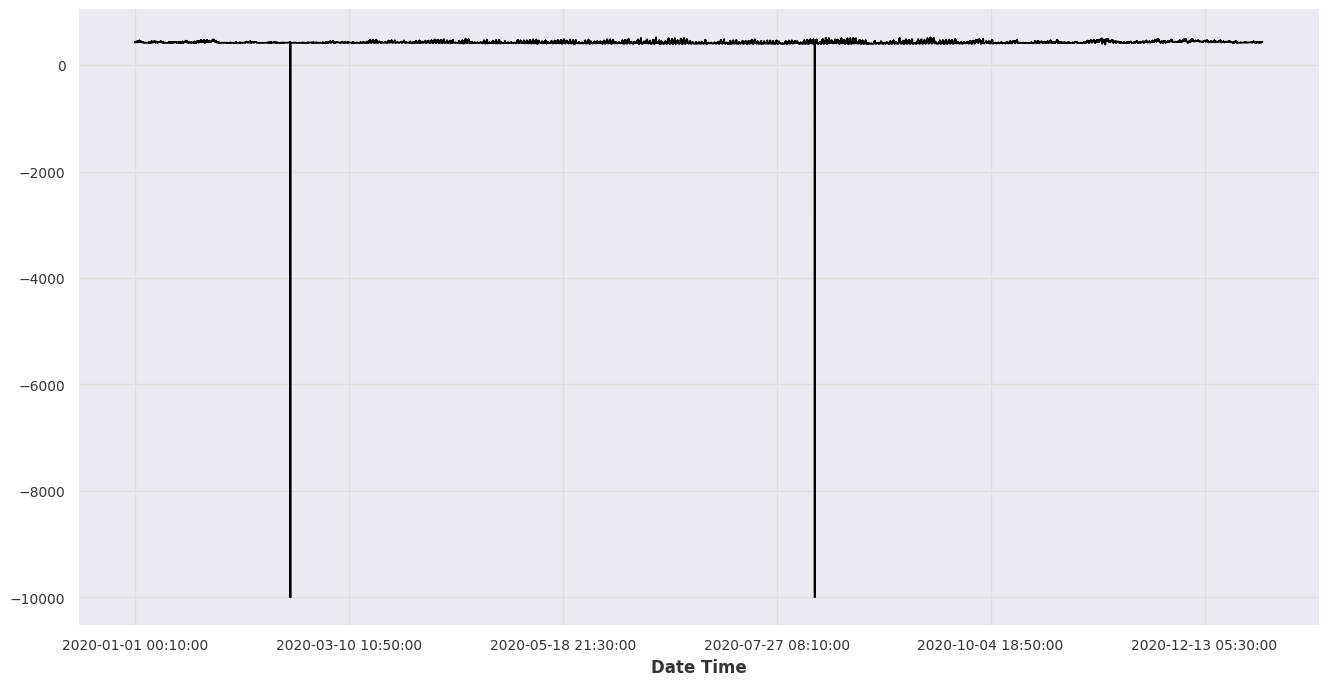

In [13]:
figsize = (16, 8)
dataset.set_index(time_col)[target_col].plot(figsize=figsize);

<Axes: xlabel='Date Time'>

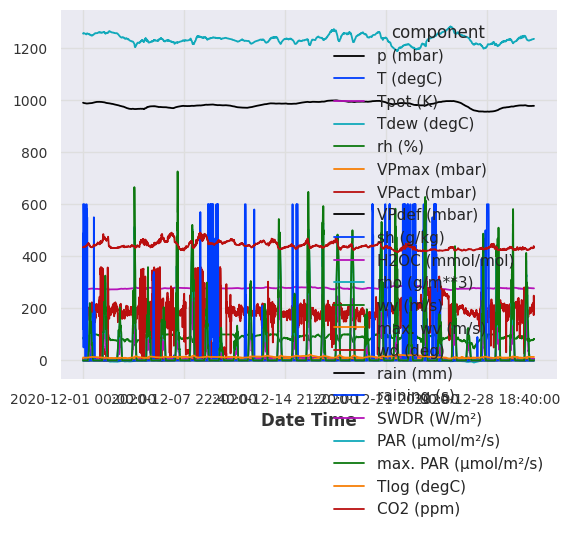

In [14]:
dataset[dataset[time_col] > '2020-12'].set_index(time_col).plot()

<Axes: xlabel='Date Time'>

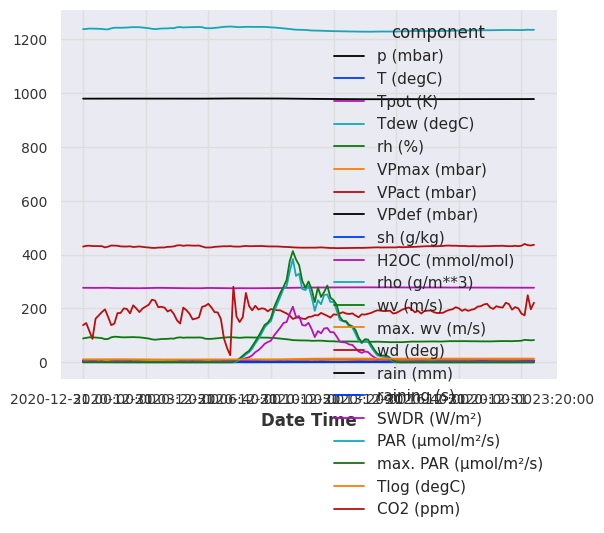

In [15]:
dataset[dataset[time_col] > '2020-12-31'].set_index(time_col).plot()

In [16]:
target_min = dataset.set_index(time_col)[target_col].min()

dataset[dataset[target_col]==target_min].tail()

component,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
31777,2020-08-08 16:20:00,991.86,34.54,308.41,11.49,24.74,54.88,13.58,41.30,8.56,...,2.83,4.23,69.15,0.0,0.0,495.33,982.23,1008.20,49.09,-9999.0
31778,2020-08-08 16:30:00,991.80,34.11,307.98,11.29,25.01,53.58,13.40,40.18,8.45,...,1.80,2.99,66.76,0.0,0.0,457.99,908.87,946.46,49.06,-9999.0
31779,2020-08-08 16:40:00,991.79,33.90,307.77,11.31,25.33,52.96,13.42,39.55,8.46,...,2.41,4.34,73.67,0.0,0.0,422.45,834.07,869.76,48.91,-9999.0
31780,2020-08-08 16:50:00,991.73,33.82,307.70,11.52,25.81,52.73,13.61,39.12,8.58,...,2.52,4.27,79.40,0.0,0.0,391.95,768.36,798.63,48.70,-9999.0
31781,2020-08-08 17:00:00,991.65,33.69,307.58,11.36,25.72,52.35,13.46,38.88,8.49,...,2.93,4.59,46.27,0.0,0.0,284.66,561.77,718.21,48.47,-9999.0


In [17]:
small_date = '2020-12-15'
medium_date = '2020-11'
large_date = '2020-08-09'

In [18]:
# trim the anomaly part
dataset_partial = df_filled[df_filled[time_col] > small_date]

In [19]:
dataset_partial

component,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
50256,2020-12-15 00:10:00,986.72,4.06,278.27,1.92,85.9,8.17,7.02,1.15,4.44,...,2.58,3.82,172.1,0.0,0.0,0.0,0.0,0.0,13.43,436.1
50257,2020-12-15 00:20:00,986.66,4.08,278.30,1.91,85.7,8.18,7.01,1.17,4.43,...,2.64,4.05,170.5,0.0,0.0,0.0,0.0,0.0,13.42,435.2
50258,2020-12-15 00:30:00,986.58,4.17,278.39,1.88,85.0,8.24,7.00,1.24,4.43,...,3.19,4.89,168.5,0.0,0.0,0.0,0.0,0.0,13.42,434.7
50259,2020-12-15 00:40:00,986.46,4.23,278.46,1.84,84.4,8.27,6.98,1.29,4.41,...,3.11,4.09,153.9,0.0,0.0,0.0,0.0,0.0,13.42,434.6
50260,2020-12-15 00:50:00,986.35,4.30,278.54,1.86,84.1,8.31,6.99,1.32,4.42,...,1.94,3.67,190.8,0.0,0.0,0.0,0.0,0.0,13.44,435.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52699,2020-12-31 23:20:00,978.32,2.28,277.16,-0.80,80.0,7.20,5.76,1.44,3.67,...,0.73,1.40,180.6,0.0,0.0,0.0,0.0,0.0,13.40,433.0
52700,2020-12-31 23:30:00,978.30,2.13,277.01,-0.43,83.1,7.12,5.92,1.20,3.77,...,0.43,0.82,174.0,0.0,0.0,0.0,0.0,0.0,13.42,439.6
52701,2020-12-31 23:40:00,978.26,1.99,276.88,-0.71,82.2,7.05,5.80,1.26,3.69,...,0.38,0.76,248.9,0.0,0.0,0.0,0.0,0.0,13.45,435.2
52702,2020-12-31 23:50:00,978.26,2.07,276.95,-0.77,81.4,7.09,5.77,1.32,3.68,...,0.57,1.07,196.6,0.0,0.0,0.0,0.0,0.0,13.47,433.9


In [20]:
dataset_partial[time_col] = dataset_partial[time_col].astype('str')

/tmp/ipykernel_111241/1747298086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_partial[time_col] = dataset_partial[time_col].astype('str')


In [21]:
# dataset[target_col] = dataset[target_col].astype(float)

In [22]:
# dataset.head()

Split dataset into train and test sets

In [23]:
train_size = 0.8
train_points = int(train_size*len(dataset_partial))
train_df = dataset_partial.iloc[:train_points]
test_df = dataset_partial.iloc[train_points:]

Plot graph

In [24]:
train_df[time_col] = train_df[time_col].astype('str')

/tmp/ipykernel_111241/2225971788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[time_col] = train_df[time_col].astype('str')


### **Train API**

Train data: convert df to list-of-list

In [25]:
train_data = []
for value in train_df.values:
    train_data.append(list(value))

In [26]:
train_data[:2]

[['2020-12-15 00:10:00',
  986.72,
  4.06,
  278.27,
  1.92,
  85.9,
  8.17,
  7.02,
  1.15,
  4.44,
  7.11,
  1236.63,
  2.58,
  3.82,
  172.1,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  13.43,
  436.1],
 ['2020-12-15 00:20:00',
  986.66,
  4.08,
  278.3,
  1.91,
  85.7,
  8.18,
  7.01,
  1.17,
  4.43,
  7.11,
  1236.48,
  2.64,
  4.05,
  170.5,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  13.42,
  435.2]]

Custom Model Request (optional)

In [27]:
# Default model request
model_request = {
    'type': 'meta_lr',  # 'meta_wa'
    'scorers': ['smape', 'mape'],
    'params': {
        'preprocessors': [
            {'type': 'dartsimputer', 'params': {'strategy': 'mean'}},
            # {'type': 'simpleimputer', 'params': {'strategy': 'mean'}},
            {'type': 'minmaxscaler'},
        ],
        'base_models': [
            {'type': 'darts_rnn'},
            {'type': 'darts_lightgbm'},
            {'type': 'darts_autotheta'},
            # {'type': 'darts_autoarima'},
            {'type': 'darts_autoets'},
            # {'type': 'stats_autotheta'},
            # {'type': 'stats_autoarima'},
            # {'type': 'stats_autoets'},
        ],
    },
}

# Customized model request
# model_request = {
#     'type': 'meta_wa',
#     'scorers': ['smape', 'mape'],
#     'param': {
#         'base_models': [
#             {'type': 'darts_autoarima'},
#             {'type': 'darts_autotheta'},
#             {'type': 'darts_autoets'},
#             {'type': 'stats_autotheta'},
#         ],
#     },
# }

Train API JSON Payload

In [28]:
train_data

[['2020-12-15 00:10:00',
  986.72,
  4.06,
  278.27,
  1.92,
  85.9,
  8.17,
  7.02,
  1.15,
  4.44,
  7.11,
  1236.63,
  2.58,
  3.82,
  172.1,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  13.43,
  436.1],
 ['2020-12-15 00:20:00',
  986.66,
  4.08,
  278.3,
  1.91,
  85.7,
  8.18,
  7.01,
  1.17,
  4.43,
  7.11,
  1236.48,
  2.64,
  4.05,
  170.5,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  13.42,
  435.2],
 ['2020-12-15 00:30:00',
  986.58,
  4.17,
  278.39,
  1.88,
  85.0,
  8.24,
  7.0,
  1.24,
  4.43,
  7.1,
  1235.98,
  3.19,
  4.89,
  168.5,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  13.42,
  434.7],
 ['2020-12-15 00:40:00',
  986.46,
  4.23,
  278.46,
  1.84,
  84.4,
  8.27,
  6.98,
  1.29,
  4.41,
  7.08,
  1235.58,
  3.11,
  4.09,
  153.9,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  13.42,
  434.6],
 ['2020-12-15 00:50:00',
  986.35,
  4.3,
  278.54,
  1.86,
  84.1,
  8.31,
  6.99,
  1.32,
  4.42,
  7.09,
  1235.13,
  1.94,
  3.67,
  190.8,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  13.44,
  435.1],
 ['2020-1

In [29]:
api_json = {
    'data': train_data,
    'model': model_request  # (optional) can be commented out
}

Build URL

In [30]:
with open('url.yaml', 'r') as file:
    url_dict = yaml.safe_load(file)

In [31]:
# URL to our SYBIL AWS service
protocol = url_dict['protocol']
host = url_dict['host']
port = url_dict['port']
endpoint = 'train'

url = '%s://%s:%s/%s' % (protocol, host, str(port), endpoint)

In [32]:
# protocol, host, port

Call endpoint, receive response JSON, write to output file

In [33]:
%%time
response = requests.post(url, json=api_json)
print(response)
print()

<Response [200]>

CPU times: user 52 ms, sys: 4.54 ms, total: 56.6 ms
Wall time: 6min 9s


In [34]:
train_json_out = response.json()  # dict output
train_json_out

{'model': 'AgEBCPBUFQAAABAA1SMQABgAAADU5AsAhXsBAD+AAGVsaZOMb5Rsb4xtlARhaZRzcmGUKIwudG2UTZNhLhRscGwVb2kMdIyMeUMohnlilE5KlADg/////////////////////////ygAFZRpBZSUlHBveJRJjC5kbUlljB0iS2nzDzgfYk5wb3h0X2VlDWWUcGxhcGNyZWFyc210clxoiGj/AJQJlGiHpk2UTv9DAfP/////////pXcflF+HaZRfYZRkBZRzbGxhdU1hgWlhaW5llHOUU29lKAUflGiHFDgoSv9dAQEBAQKUMYw2ApSUbXVoaAECUk7/YkcM4ZnXR+FcADOZ69dcR3tpH5lhlEtSlJ+jp6uvdIYGfXNvlGVnaId0ZV2Uc22BkDpoH2gBXaGlqa2xS2EAlGhmAAB6AHDXjz3X9RSjAJkAzHBmHzNifSCUhWhoaGhoZXVo4GhLUmLZlHVvb2RldFKUX12MH3KUBHJsYW6UZJRhcxRhaV9zb1QWYnJvlHR0MXMoHSJNYJcfwXO8NX5F52QKLF++WU0n2K4sa+7BU+ejLKWkzMefPGkfDPsmuOfTxeImccVX0HciHmSL+V5jX+1TK6GINtTd/Fsff60weSQhqgzqePt1OYO0wKVTD7o+7NR1uQvLVP+rgSEflJC8ZZuum4ADoBcbi/Pph+Eba2rtrTkkidgFjIaVkQwfDWtYBkC983IZ/N2lvF3WDsraoeveVdM2Yst0bunpuzUfV8/sMDXO8inJjd+DieKmZhersRonRExAZom7HZM0W2QfwJadc1CQ6AC+hbK6Xe6AXs66hUiRruBMFopWGzxy8aMf7c/U7+oKb7jvS8XWeg1Qk0hYh+IZYGbb9LPMhz5yyrIfUiHVHjjqXTJikFVglfHjawZmaMMJaYA32AP3E24UV00fSwXb2aI/vu5qXgrWxQ0EJ7zjtHgpZozfdJRzS3MAcnMfEGlzU5QJaXhyL

### **Forecast API**

Forecast Dates: predict the next 32 years of temperature anomaly data (1980-2012)

In [35]:
test_data = []
for value in test_df.drop(columns=target_col).values:
    test_data.append(list(value))

In [36]:
test_data[:2]

[['2020-12-28 14:30:00',
  955.78,
  3.64,
  280.39,
  -0.92,
  71.96,
  7.93,
  5.71,
  2.22,
  3.72,
  5.97,
  1200.2,
  2.85,
  4.16,
  152.4,
  0.0,
  0.0,
  28.0,
  59.27,
  68.11,
  14.36],
 ['2020-12-28 14:40:00',
  955.76,
  3.66,
  280.42,
  -1.02,
  71.35,
  7.95,
  5.67,
  2.28,
  3.7,
  5.93,
  1200.1,
  2.47,
  3.77,
  151.5,
  0.0,
  0.0,
  22.03,
  47.35,
  50.01,
  14.32]]

Model from Train API

In [37]:
model = train_json_out['model']

Forecast API JSON Payload

In [38]:
api_json = {
    'model': model,
    'data': test_data
}

Build URL (same as train except for the endpoint)

In [39]:
endpoint = 'forecast'

url = '%s://%s:%s/%s' % (protocol, host, str(port), endpoint)

Call endpoint, receive response JSON, write to output file

In [40]:
%%time
response = requests.post(url, json=api_json)
print(response)
print()

<Response [200]>

CPU times: user 47.5 ms, sys: 0 ns, total: 47.5 ms
Wall time: 2.19 s


In [41]:
forecast_json_out = response.json()  # dict output
forecast_json_out

{'data': [['2020-12-28T14:30:00', -225739803491.2212],
  ['2020-12-28T14:40:00', -225739803491.1709],
  ['2020-12-28T14:50:00', -225739803490.89062],
  ['2020-12-28T15:00:00', -225739803490.85107],
  ['2020-12-28T15:10:00', -225739803490.86597],
  ['2020-12-28T15:20:00', -225739803490.99365],
  ['2020-12-28T15:30:00', -225739803490.771],
  ['2020-12-28T15:40:00', -225739803490.8916],
  ['2020-12-28T15:50:00', -225739803491.47144],
  ['2020-12-28T16:00:00', -225739803491.00195],
  ['2020-12-28T16:10:00', -225739803491.29224],
  ['2020-12-28T16:20:00', -225739803491.32227],
  ['2020-12-28T16:30:00', -225739803491.0581],
  ['2020-12-28T16:40:00', -225739803491.46338],
  ['2020-12-28T16:50:00', -225739803491.49976],
  ['2020-12-28T17:00:00', -225739803491.37646],
  ['2020-12-28T17:10:00', -225739803491.05664],
  ['2020-12-28T17:20:00', -225739803490.96216],
  ['2020-12-28T17:30:00', -225739803491.04272],
  ['2020-12-28T17:40:00', -225739803491.14136],
  ['2020-12-28T17:50:00', -22573980349

Combine forecast dates and output

In [42]:
forecast_df = pd.DataFrame(
    data=forecast_json_out['data'],
    columns=[time_col, target_col],
)

In [43]:
forecast_df.shape

(490, 2)

In [44]:
forecast_df.columns

Index(['Date Time', 'CO2 (ppm)'], dtype='object')

In [45]:
forecast_df.head()

,Date Time,CO2 (ppm)
0,2020-12-28T14:30:00,-2.257398e+11
1,2020-12-28T14:40:00,-2.257398e+11
2,2020-12-28T14:50:00,-2.257398e+11
3,2020-12-28T15:00:00,-2.257398e+11
4,2020-12-28T15:10:00,-2.257398e+11


In [46]:
forecast_df.tail()

,Date Time,CO2 (ppm)
485,2020-12-31T23:20:00,-2.257398e+11
486,2020-12-31T23:30:00,-2.257398e+11
487,2020-12-31T23:40:00,-2.257398e+11
488,2020-12-31T23:50:00,-2.257398e+11
489,2021-01-01T00:00:00,-2.257398e+11


Plot train and forecast side-by-side

/tmp/ipykernel_111241/2998340865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['color'] = 'b'


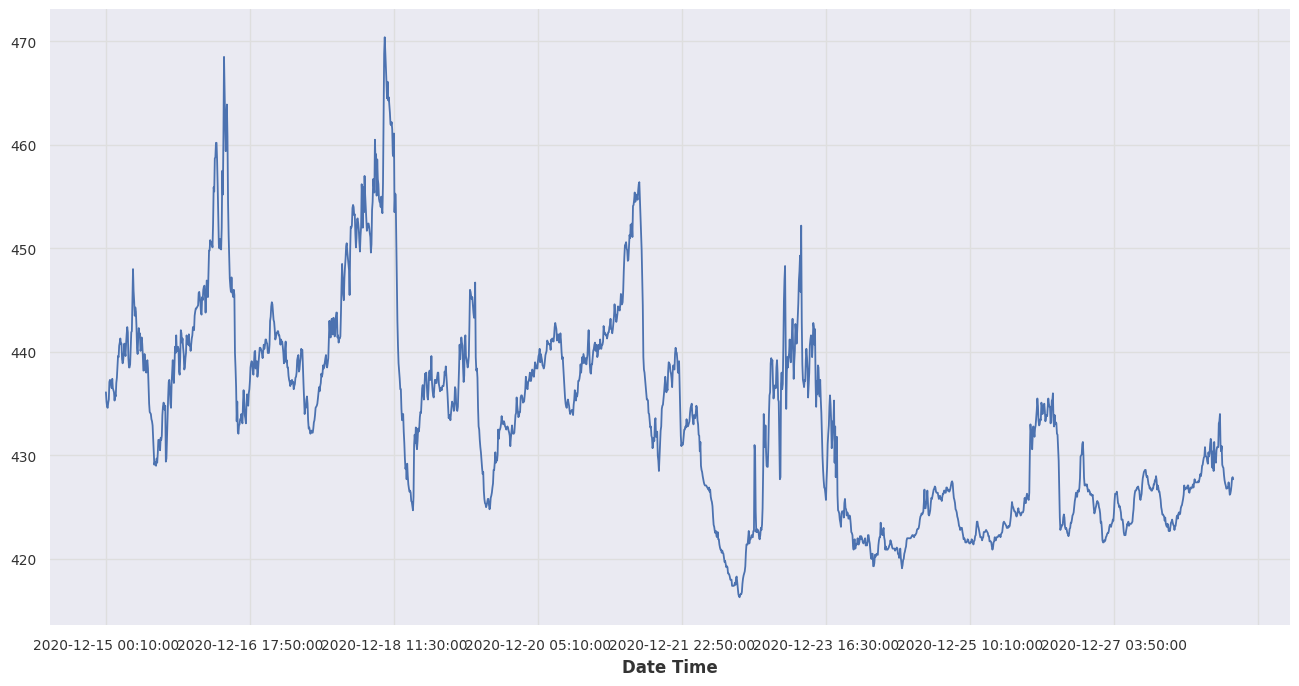

In [47]:
train_df['color'] = 'b'
train_df.set_index(time_col)[target_col].plot(figsize=figsize, color=train_df['color']);

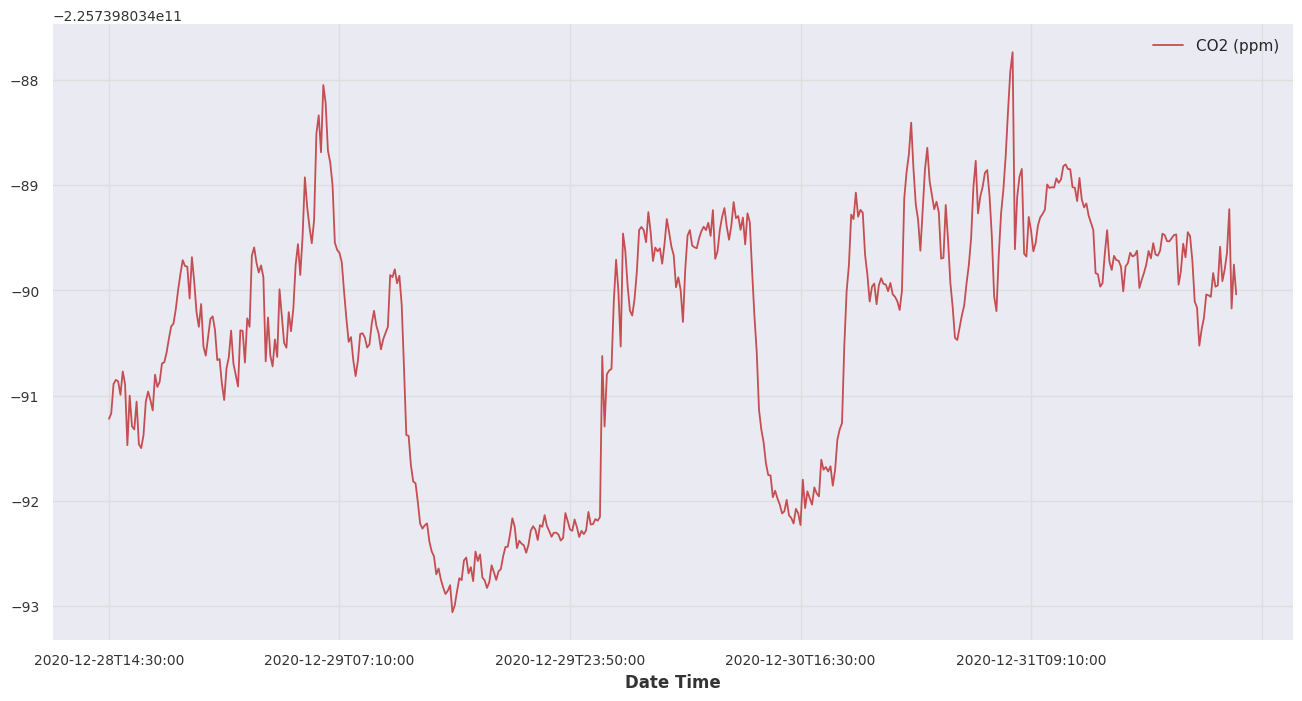

In [48]:
forecast_df['color'] = 'r'
forecast_df.set_index(time_col).plot(figsize=figsize, color=forecast_df['color']);

Combine train and forecast sets

In [49]:
df = pd.concat([train_df, forecast_df]).reset_index(drop=True)

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.tail()

Plot combined train and forecast sets with the vertical black line as the cut-off

In [ ]:
df.set_index(time_col)[target_col].plot(figsize=figsize, color='r')
plt.axvline(x=len(train_df), color='black', label='Train/Forecast set cut-off')
plt.text(x=len(train_df)-9, y=forecast_df[target_col].max(), s='Train', fontweight='bold', fontsize=14)
plt.text(x=len(train_df)+1, y=forecast_df[target_col].max(), s='Forecast', fontweight='bold', fontsize=14)
plt.ylabel(ylabel='# Patients')
plt.title(label='Total Number of Patients (Train: 1997-2013) (Forecast: 2013-2017)', fontweight='bold', fontsize=20)
plt.show();

Plot original dataset to compare

In [ ]:
figsize = (16, 8)
dataset.set_index(time_col)[target_col].plot(figsize=figsize);
plt.ylabel(ylabel='# Patients')
plt.title(label='Total Number of Patients (1997-2022)', fontweight='bold', fontsize=20)
plt.show();

Plot original dataset (blue) with SYBIL forecasted values (red)

In [ ]:
df.set_index(time_col)[target_col].plot(figsize=figsize, color='r')
dataset.set_index(time_col)[target_col].plot(figsize=figsize);
plt.axvline(x=len(train_df), color='black', label='Train/Forecast set cut-off')
plt.text(x=len(train_df)-9, y=forecast_df[target_col].max(), s='Train', fontweight='bold', fontsize=14)
plt.text(x=len(train_df)+1, y=forecast_df[target_col].max(), s='Forecast', fontweight='bold', fontsize=14)
plt.ylabel(ylabel='# Patients')
plt.title(label='Total Number of Patients (Train: 1997-2013) (Forecast: 2013-2017)', fontweight='bold', fontsize=20)
plt.show();